In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
%matplotlib inline

In [2]:
bullet_voting = pd.read_csv("16candidatesbydistrict.csv")
bullet_voting['% Blank'] = bullet_voting['Blank Votes']/bullet_voting['Total Votes']

In [3]:
normalized = bullet_voting[bullet_voting['Dem'] == bullet_voting['#Seats']]
normalized = normalized[normalized['Rep'] == normalized['#Seats']]
normalized = normalized[normalized['Prog'] == 0]
normalized = normalized[normalized['Fusion'] == 0]
normalized = normalized[normalized['Other/Ind'] == 0]
multimember = normalized[normalized['#Seats'] == 2]
single_member = normalized[normalized['#Seats'] == 1]

In [4]:
single_average = single_member['Blank Votes'].sum()/single_member['Total Votes'].sum()
multi_average = multimember['Blank Votes'].sum()/multimember['Total Votes'].sum()

In [5]:
uv_slope, uv_intercept, uv_r_value, p_value, std_err = stats.linregress(normalized['#Seats'], normalized['% Blank'])
print('R_Squared_normalized Races: {}'.format(uv_r_value**2))
print('p_value_normalizedized Races: {}'.format(p_value))

R_Squared_normalized Races: 0.8876324405785293
p_value_normalizedized Races: 2.4541268321601073e-14


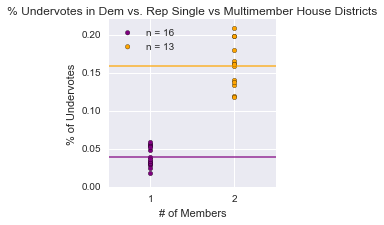

In [6]:
plt.figure(figsize=(3, 3))
plt.title('% Undervotes in Dem vs. Rep Single vs Multimember House Districts')
plt.ylabel('% of Undervotes')
plt.xlabel('# of Members')
plt.ylim(0, .22)
plt.xlim(.5, 2.5)
plt.xticks((1, 2))
plt.scatter(single_member['#Seats'], single_member['% Blank'], c='purple', label='n = {}'.format(len(single_member)))
plt.scatter(multimember['#Seats'], multimember['% Blank'], c='orange', label='n = {}'.format(len(multimember)))
plt.axhline(y=single_average, c='purple', alpha=.7)
plt.axhline(y=multi_average, c='orange', alpha=.7)
plt.legend(loc='upper left')

In [7]:
contested = bullet_voting[bullet_voting['Contested'] == 'Y']
uncontested = bullet_voting[bullet_voting['Contested'] == 'N']

In [8]:
contested_average = contested['Blank Votes'].sum()/contested['Total Votes'].sum()
uncontested_average = uncontested['Blank Votes'].sum()/uncontested['Total Votes'].sum()
print('Average % Blank Votes in Uncontested Race: {}'.format(uncontested_average))
print('Average % Blank Votes in Contested Race: {}'.format(contested_average))
print('Difference: {}'.format(uncontested_average - contested_average))

Average % Blank Votes in Uncontested Race: 0.2591737717273541
Average % Blank Votes in Contested Race: 0.1604904423296895
Difference: 0.09868332939766461


In [9]:
normalized2 = bullet_voting[bullet_voting['Contested'] == 'Y']
multimember2 = normalized2[normalized2['#Seats'] == 2]
single_member2 = normalized2[normalized2['#Seats'] == 1]
single_average2 = single_member2['Blank Votes'].sum()/single_member2['Total Votes'].sum()
multi_average2 = multimember2['Blank Votes'].sum()/multimember2['Total Votes'].sum()

In [10]:
uv2_slope, uv2_intercept, uv2_r_value, p2_value, std_err = stats.linregress(normalized2['#Seats'], normalized2['% Blank'])
print('R_Squared_Contested Races: {}'.format(uv2_r_value**2))
print('p_value_Contested Races: {}'.format(p2_value))

R_Squared_Contested Races: 0.7339147644219174
p_value_Contested Races: 1.310444718379377e-18


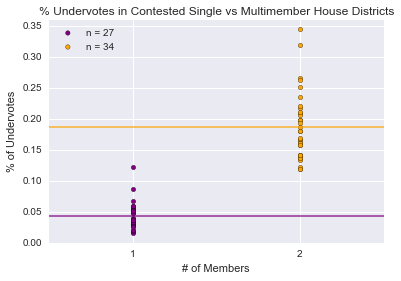

In [11]:
plt.title('% Undervotes in Contested Single vs Multimember House Districts')
plt.ylabel('% of Undervotes')
plt.xlabel('# of Members')
plt.ylim(0, .36)
plt.xlim(.5, 2.5)
plt.xticks((1, 2))
plt.scatter(single_member2['#Seats'], single_member2['% Blank'], c='purple', label='n = {}'.format(len(single_member2)))
plt.scatter(multimember2['#Seats'], multimember2['% Blank'], c='orange', label='n = {}'.format(len(multimember2)))
plt.axhline(y=single_average2, c='purple', alpha=.7)
plt.axhline(y=multi_average2, c='orange', alpha=.7)
plt.legend(loc='upper left')